# ImageStorageCli

This Notebook shows a basic example of how to interact with _ImageStorage_ API through Python, using the ``ImageStorageCli`` class.

In [47]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import tempfile

from toolbox.Projects.ImageStorage import ImageStorageCli
from toolbox.Context import ContextCli
from toolbox.Structures import BoundingBox
from toolbox import DataModels

Create a ``ImageStoragestorage_cli`` object that will connect to a _ImageStorage_ API running on local host port ``9001``

In [48]:
storage_cli = ImageStorageCli(
    "127.0.0.1",
    9001
)

Create a sample image

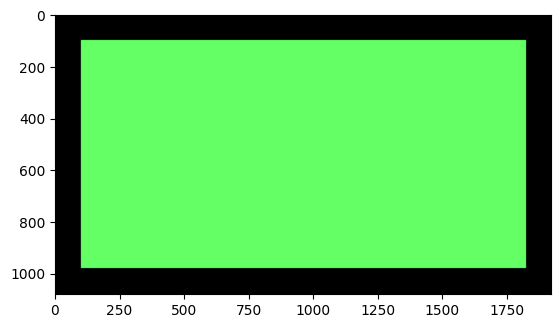

In [49]:
image = np.zeros((1080,1920,3), dtype="uint8")
image[100:-100, 100:-100] = (100,255,100)
plt.imshow(image)

Upload the image to the image storage

In [50]:
image_id = storage_cli.upload_image(image)
print("Uploaded image ID:", image_id)

Uploaded image ID: urn:ngsi-ld:Image:RaDOV_BcKQIYpQCtSN1JTep6ufTBAMY4sHJnIjCVtVQ


Download and show the image

Image type: <class 'toolbox.Structures.Image.Image'>
Image numpy shape: (1080, 1920, 3)
Image URL: http://127.0.0.1:9001/urn:ngsi-ld:Image:RaDOV_BcKQIYpQCtSN1JTep6ufTBAMY4sHJnIjCVtVQ


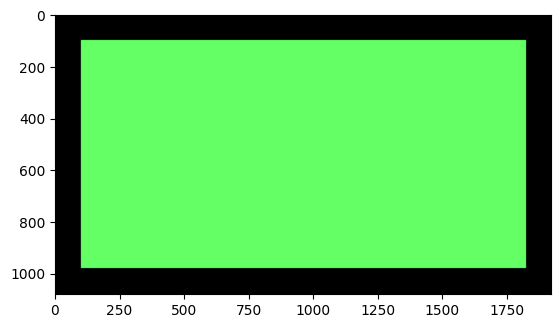

In [51]:
image_object = storage_cli.download(image_id)
print("Image type:", type(image_object))
print("Image numpy shape:", image_object.image.shape)
print("Image URL:", image_object.path)

# Show the image
plt.imshow(image_object.image)

Upload an image from a file

Temporary image path C:\Users\HE7\AppData\Local\Temp\tmp1g_5zfok\image.png


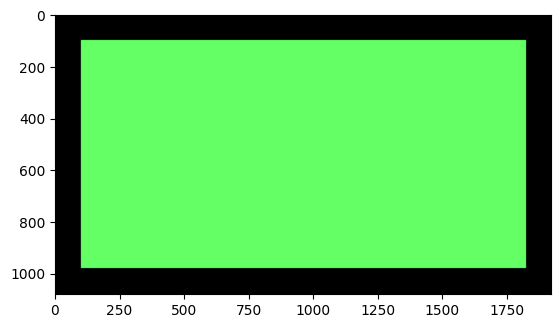

In [65]:
# Save the image to a temporary path
with tempfile.TemporaryDirectory() as tmp:
    image_path = Path(tmp) / "image.png"
    cv2.imwrite(str(image_path), image)
    print("Temporary image path", image_path)

    # Upload the image
    image_id = storage_cli.upload_file(image_path)

# Show the image
image_object = storage_cli.download(image_id)
plt.imshow(image_object.image)

The _ImageStorage_ API also allow the visualization of the Toolbox data models. Here we will create and post a mock data model to create a visualization of it.

In [66]:
# Using a context broker on local host, port 1026
context_cli = ContextCli(
    "127.0.0.1",
    1026
)

# Create a Face data model
face = DataModels.Face(
    image=image_id,
    boundingBox=BoundingBox(0.3,0.3,0.7,0.7),
    recognized=True,
    recognizedDistance=1,
    recognizedPerson="Test"
)

# Post the entity
entity = context_cli.post_data_model(face)
print(entity)

{'id': 'urn:ngsi-ld:Face:62t5sgoaEe6OF2Rdhs3zPw', 'type': 'Face', '@context': ['https://uri.etsi.org/ngsi-ld/v1/ngsi-ld-core-context.jsonld'], 'dateCreated': {'type': 'Property', 'value': {'@type': 'DateTime', '@value': '2023-06-13T20:48:43Z'}}, 'dateModified': {'type': 'Property', 'value': {'@type': 'DateTime', '@value': '2023-06-13T20:48:43Z'}}, 'dateObserved': {'type': 'Property', 'value': {'@type': 'DateTime', '@value': '2023-06-13T20:48:43Z'}}, 'image': {'type': 'Relationship', 'object': 'urn:ngsi-ld:Image:4xBUKaXhnv23ToGBZ4mm4GjGQyZq0EFeqELDj8SdZTs'}, 'boundingBox': {'type': 'Property', 'value': {'xmin': 0.3, 'ymin': 0.3, 'xmax': 0.7, 'ymax': 0.7}}, 'recognized': {'type': 'Property', 'value': True}, 'recognizedDistance': {'type': 'Property', 'value': 1.0}, 'recognizedPerson': {'type': 'Property', 'value': 'Test'}}


Visualize the posted data model. It will show the previous image with a bounding box drawn at the center

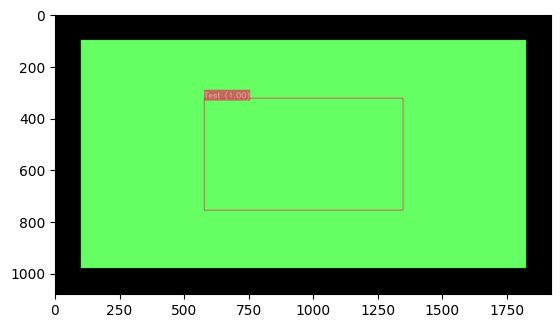

In [62]:
entity_id = entity["id"]
visualization_id = storage_cli.visualize(entity_id)
image_object = storage_cli.download(visualization_id)
plt.imshow(image_object.image)

We can also modify the visualization parameters. See the ``toolbox.Visualization.Defaults.Defaults`` module for the full list of accepted parameters.

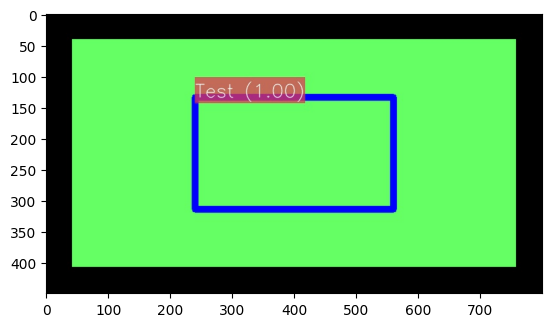

In [64]:
vis_params = {
    "image_width": 800,
    "box_thickness": 10,
    "box_color": (0,0,255)
}
visualization_id = storage_cli.visualize(entity_id, vis_params)
image_object = storage_cli.download(visualization_id)
plt.imshow(image_object.image)